In [ ]:
# ## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-y_6yc97q
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-y_6yc97q
     |████████████████████████████████| 153kB 8.0MB/s 
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-6ja_ucxm/pyfolio
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-6ja_ucxm/pyfolio
     |████████████████████████████████| 6.3MB 28.4MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
  Created wheel for finrl: filename=finrl-0.3.0-cp37-none-any.whl size=38749 sha256=d4881e1e6800aeda1f19c25e830acccf0fa8415a90cc47699d576697ca377a46
  Stored in directory: /tmp/pip-ephem-wheel-cache-3qghl1_v/wheels/9c/19/bf/c644def96612df1ad42c94d5304966797eaa3221dffc5efe0b
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=49084a8bc01c08639e6c78d3a3d4493820fc4030d101a55201d280b9bbc98a83
 

In [ ]:
!pip install cloudpickle==1.6.0

  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime
import pickle as pkl

%matplotlib inline
from finrl.config import config
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.preprocessing.preprocessors import FeatureEngineer
from finrl.preprocessing.data import data_split
from finrl.env.env_stocktrading import StockTradingEnv
from finrl.model.models import DRLAgent,DRLEnsembleAgent
from finrl.trade.backtest import backtest_stats,backtest_plot, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
# from config.py start_date is a string
config.START_DATE

'2000-01-01'

In [ ]:
print(config.NAS_100_TICKER)

['AMGN', 'AAPL', 'AMAT', 'INTC', 'PCAR', 'PAYX', 'MSFT', 'ADBE', 'CSCO', 'XLNX', 'QCOM', 'COST', 'SBUX', 'FISV', 'CTXS', 'INTU', 'AMZN', 'EBAY', 'BIIB', 'CHKP', 'GILD', 'NLOK', 'CMCSA', 'FAST', 'ADSK', 'CTSH', 'NVDA', 'GOOGL', 'ISRG', 'VRTX', 'HSIC', 'BIDU', 'ATVI', 'ADP', 'ROST', 'ORLY', 'CERN', 'BKNG', 'MYL', 'MU', 'DLTR', 'ALXN', 'SIRI', 'MNST', 'AVGO', 'TXN', 'MDLZ', 'FB', 'ADI', 'WDC', 'REGN', 'LBTYK', 'VRSK', 'NFLX', 'TSLA', 'CHTR', 'MAR', 'ILMN', 'LRCX', 'EA', 'AAL', 'WBA', 'KHC', 'BMRN', 'JD', 'SWKS', 'INCY', 'PYPL', 'CDW', 'FOXA', 'MXIM', 'TMUS', 'EXPE', 'TCOM', 'ULTA', 'CSX', 'NTES', 'MCHP', 'CTAS', 'KLAC', 'HAS', 'JBHT', 'IDXX', 'WYNN', 'MELI', 'ALGN', 'CDNS', 'WDAY', 'SNPS', 'ASML', 'TTWO', 'PEP', 'NXPI', 'XEL', 'AMD', 'NTAP', 'VRSN', 'LULU', 'WLTW', 'UAL']


In [ ]:
df = YahooDownloader(start_date = config.START_DATE,
                     end_date = '2021-01-19',
                     ticker_list = config.NAS_100_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
with open('stocks-raw-data.pkl','wb+') as myfile:
    pkl.dump(df,myfile)
    
with open('stocks-raw-data.pkl','rb+') as myfile:
    df = pkl.load(myfile)

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2000-01-03,0.936384,1.004464,0.907924,0.859423,535796800.0,AAPL,0
1,2000-01-03,16.812500,16.875000,16.062500,16.274673,7384400.0,ADBE,0
2,2000-01-03,46.750000,46.937500,44.000000,30.033604,3655600.0,ADI,0
3,2000-01-03,42.428928,42.775894,41.189766,26.281422,2698899.0,ADP,0
4,2000-01-03,8.500000,8.656250,8.031250,8.052903,2845600.0,ADSK,0


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
465811,2021-01-15,50.189999,52.119999,49.980000,51.209999,5866800.0,WDC,4
465812,2021-01-15,203.589996,207.229996,203.589996,206.024582,979900.0,WLTW,4
465813,2021-01-15,108.430000,108.430000,105.769997,106.230003,2836300.0,WYNN,4
465814,2021-01-15,63.410000,65.050003,63.040001,64.479050,3811600.0,XEL,4
465815,2021-01-15,139.570007,141.259995,136.149994,136.600006,2280200.0,XLNX,4


In [ ]:
df.shape

(465816, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2000-01-03,0.936384,1.004464,0.907924,0.859423,535796800.0,AAPL,0
1,2000-01-03,16.812500,16.875000,16.062500,16.274673,7384400.0,ADBE,0
2,2000-01-03,46.750000,46.937500,44.000000,30.033604,3655600.0,ADI,0
3,2000-01-03,42.428928,42.775894,41.189766,26.281422,2698899.0,ADP,0
4,2000-01-03,8.500000,8.656250,8.031250,8.052903,2845600.0,ADSK,0


In [ ]:
config.TECHNICAL_INDICATORS_LIST = []

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = config.TECHNICAL_INDICATORS_LIST,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [ ]:
with open('stocks-processed-data.pkl','wb+') as myfile:
    pkl.dump(processed_full,myfile)
    
with open('stocks-processed-data.pkl','rb+') as myfile:
    processed_full = pkl.load(myfile)

In [ ]:
processed_full.sample(5)

,date,tic,open,high,low,close,volume,day,turbulence
321241,2008-11-20,MELI,9.000000,9.160000,8.060000,8.023298,571200.0,3.0,361.504735
750164,2020-10-01,MCHP,106.080002,108.010002,105.010002,106.467697,2444400.0,3.0,114.958938
258056,2007-02-21,VRSN,26.160000,26.350000,26.030001,22.324184,1333100.0,2.0,73.127680
723171,2020-01-02,WYNN,142.059998,144.389999,141.750000,142.405029,3006500.0,3.0,163.214585
443837,2012-04-12,CSCO,20.090000,20.280001,19.980000,15.170581,32041300.0,3.0,89.072851


In [ ]:
# config.TECHNICAL_INDICATORS_LIST.append('atr')

In [ ]:
config.TECHNICAL_INDICATORS_LIST

[]

In [ ]:
stock_dimension = len(processed_full.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.TECHNICAL_INDICATORS_LIST)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 99, State Space: 199


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 50_000_000/100, #Since in Indonesia the minimum number of shares per trx is 100, then we scaled the initial amount by dividing it with 100 
    "buy_cost_pct": 0.0019, #IPOT has 0.19% buy cost
    "sell_cost_pct": 0.0029, #IPOT has 0.29% sell cost
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": config.TECHNICAL_INDICATORS_LIST, 
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
}

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2000-01-01'
train_end = '2019-01-01'
val_test_start = '2019-01-01'
val_test_end = '2021-01-18'

ensemble_agent = DRLEnsembleAgent(df=processed_full,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      "action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 50_000,
                      "learning_rate": 0.000005,
                      "batch_size": 128
                    }

timesteps_dict = {'a2c' : 100_000, 
                 'ppo' : 100_000, 
                 'ddpg' : 50_000
                 }

In [ ]:
# %%capture cap --no-stderr
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

# with open('ensemble_model_output.txt', 'w') as f:
#     f.write(str(cap))

============Start Ensemble Strategy============
nan
turbulence_threshold:  1557.8459581625525
======Model training from:  2000-01-01 to  2019-01-02
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cuda device
======A2C Validation from:  2019-01-02 to  2019-04-03
A2C Sharpe Ratio:  0.19936337756953643
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 128}
Using cuda device
======PPO Validation from:  2019-01-02 to  2019-04-03
PPO Sharpe Ratio:  0.2937823832225953
======DDPG Training========
{'action_noise': OrnsteinUhlenbeckActionNoise(mu=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.], sigma=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2019-01-02,2019-04-03,DDPG,0.199363,0.293782,0.568603
1,189,2019-04-03,2019-07-03,DDPG,-0.282606,-0.0351521,0.039513
2,252,2019-07-03,2019-10-02,DDPG,-0.34196,-0.353247,-0.135689
3,315,2019-10-02,2020-01-02,DDPG,0.42815,0.22842,0.473681
4,378,2020-01-02,2020-04-02,DDPG,-0.343866,-0.372855,-0.289524
5,441,2020-04-02,2020-07-02,DDPG,0.372383,0.302053,0.51217
6,504,2020-07-02,2020-10-01,DDPG,0.0287393,0.0442142,0.084144


In [ ]:
with open('model_perf.pkl','wb+') as myfile:
    pkl.dump(df_summary,myfile)
    
with open('model_perf.pkl','rb+') as myfile:
    df_summary = pkl.load(myfile)

In [ ]:
# with open('stocks-processed-data-after-training.pkl','wb+') as myfile:
#     pkl.dump(processed_full,myfile)
    
with open('stocks-processed-data-after-training.pkl','rb+') as myfile:
    processed_full = pkl.load(myfile)

In [ ]:
unique_trade_date = processed_full[(processed_full.date > val_test_start)&(processed_full.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results_baseline/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.9399882656136606


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,500000.000000,2019-04-03,NaN,2019-04-03
1,497344.420298,2019-04-04,-0.005311,2019-04-04
2,501624.501616,2019-04-05,0.008606,2019-04-05
3,502421.929256,2019-04-08,0.001590,2019-04-08
4,500092.303248,2019-04-09,-0.004637,2019-04-09


In [ ]:
df_account_value.to_csv("df_account_value_baseline_model.csv")

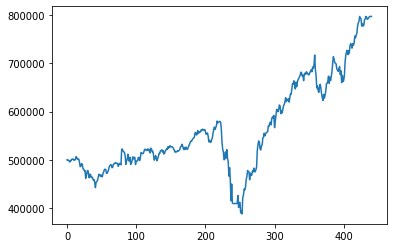

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.225860
Cumulative returns     0.428143
Annual volatility      0.281328
Sharpe ratio           0.866845
Calmar ratio           0.770172
Stability              0.456013
Max drawdown          -0.293259
Omega ratio            1.176540
Sortino ratio          1.224371
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.869176
Daily value at risk   -0.034476
dtype: float64


==============Compare to IHSG===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (440, 8)


Start date,2019-04-03
End date,2020-12-29
Total months,20
,Backtest
Annual return,22.146%
Cumulative returns,41.806%
Annual volatility,28.161%
Sharpe ratio,0.85
Calmar ratio,0.76
Stability,0.45
Max drawdown,-29.326%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.33,2020-02-19,2020-04-03,2020-07-10,103
1,12.98,2020-09-02,2020-09-23,2020-11-09,49
2,9.60,2019-07-15,2019-08-05,2019-12-26,119
3,7.74,2019-04-15,2019-06-03,2019-06-18,47
4,3.75,2020-11-09,2020-11-10,2020-11-16,6


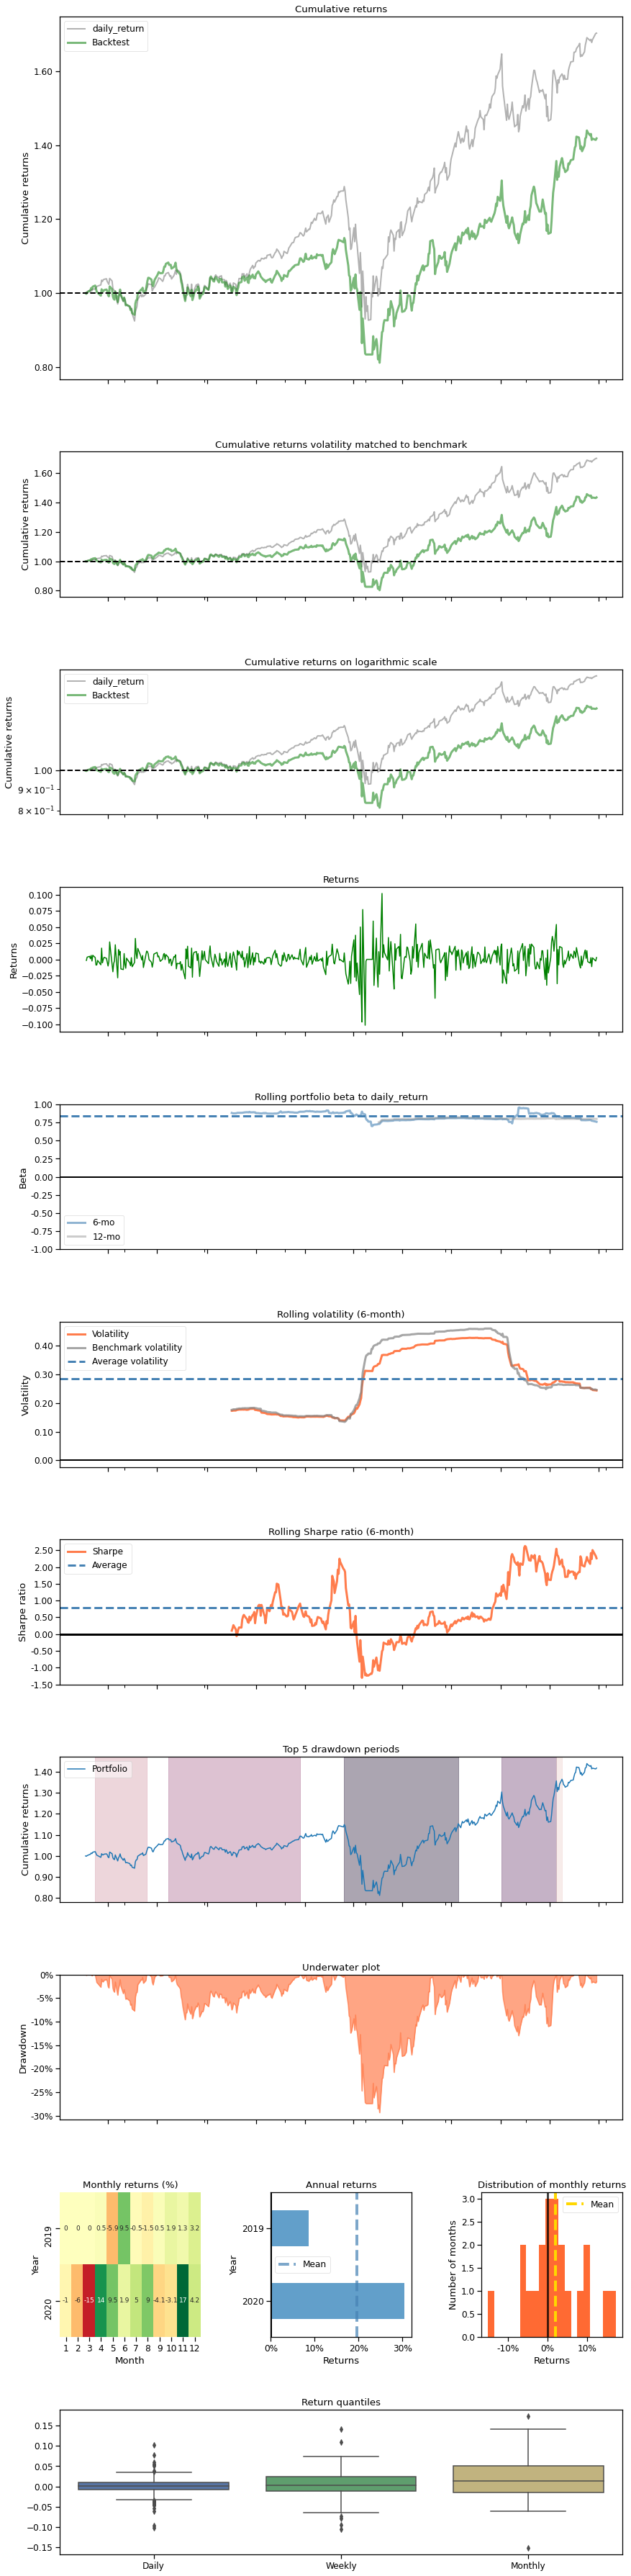

In [ ]:
print("==============Compare to IHSG===========")
%matplotlib inline
backtest_plot(df_account_value, 
             baseline_ticker = '^NDX', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

==============Compare to IHSG===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (440, 8)


Start date,2019-04-03
End date,2020-12-29
Total months,20
,Backtest
Annual return,22.146%
Cumulative returns,41.806%
Annual volatility,28.161%
Sharpe ratio,0.85
Calmar ratio,0.76
Stability,0.45
Max drawdown,-29.326%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,29.33,2020-02-19,2020-04-03,2020-07-10,103
1,12.98,2020-09-02,2020-09-23,2020-11-09,49
2,9.60,2019-07-15,2019-08-05,2019-12-26,119
3,7.74,2019-04-15,2019-06-03,2019-06-18,47
4,3.75,2020-11-09,2020-11-10,2020-11-16,6


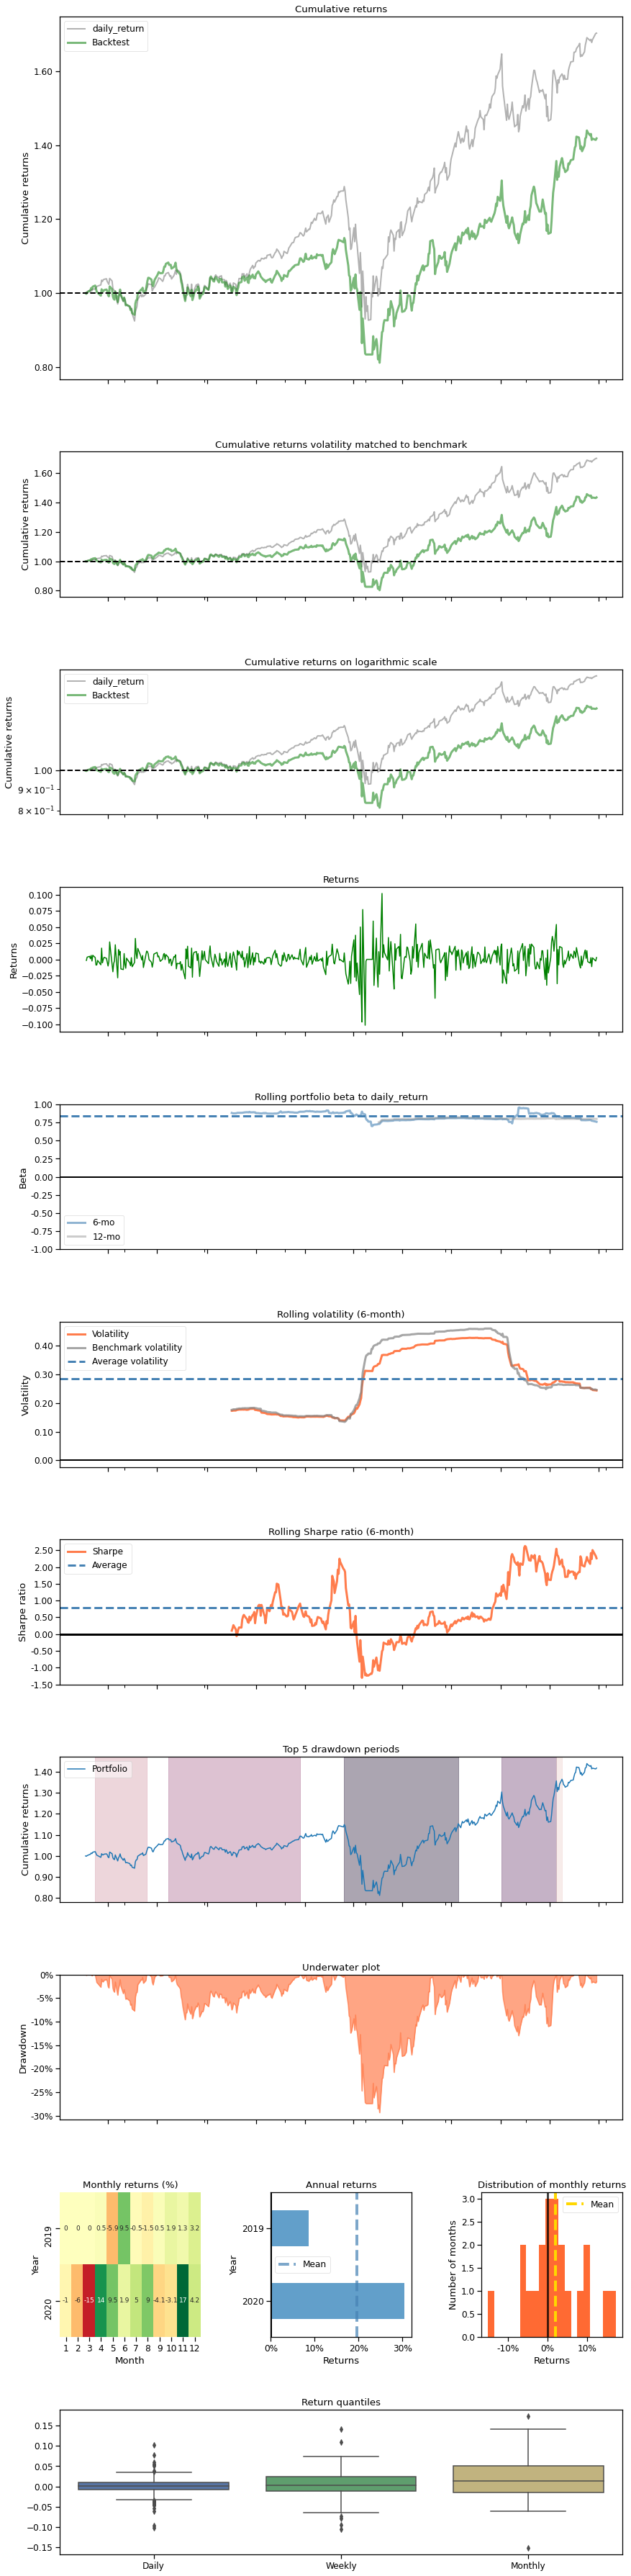

In [ ]:
print("==============Compare to IHSG===========")
%matplotlib inline
# backtest_plot(df_account_value, 
#              baseline_ticker = '^JKSE', 
#              baseline_start = df_account_value.loc[0,'date'],
#              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

backtest_plot(df_account_value, baseline_ticker = 'NDX',
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [ ]:
print("==============Get Baseline Stats===========")
baseline_perf_stats=get_baseline('^NDX',
                                  start=df_account_value.loc[0,'date'],
                                  end = df_account_value.loc[len(df_account_value)-1,'date'])

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (440, 8)


In [ ]:
baseline_perf_stats

,date,open,high,low,close,volume,tic,day
0,2019-04-03,7538.169922,7589.689941,7520.399902,7544.970215,2487210000,^NDX,2
1,2019-04-04,7542.160156,7571.129883,7496.299805,7540.569824,2094200000,^NDX,3
2,2019-04-05,7564.270020,7581.899902,7554.910156,7578.839844,2148730000,^NDX,4
3,2019-04-08,7565.060059,7602.080078,7536.419922,7599.740234,2069190000,^NDX,0
4,2019-04-09,7571.879883,7596.750000,7555.620117,7568.490234,2067570000,^NDX,1
...,...,...,...,...,...,...,...,...
435,2020-12-22,12715.480469,12761.230469,12606.419922,12717.559570,5700760000,^NDX,1
436,2020-12-23,12733.750000,12737.589844,12649.599609,12653.139648,7028650000,^NDX,2
437,2020-12-24,12668.200195,12732.549805,12665.799805,12711.009766,3305950000,^NDX,3
438,2020-12-28,12813.969727,12861.910156,12747.049805,12838.860352,5076340000,^NDX,0
